In [13]:
!pip install --upgrade "watson-developer-cloud>=2.5.1"

Requirement already up-to-date: watson-developer-cloud>=2.5.1 in d:\anaconda\envs\tensorflow\lib\site-packages (2.8.1)


In [23]:
import json
from watson_developer_cloud import NaturalLanguageUnderstandingV1
from watson_developer_cloud.natural_language_understanding_v1 import Features, SentimentOptions

In [44]:
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2018-11-16',
    iam_apikey='xxxx',
    url='https://gateway-wdc.watsonplatform.net/natural-language-understanding/api'
)

response = natural_language_understanding.analyze(
    url='www.wsj.com/news/markets',
    features=Features(sentiment=SentimentOptions(targets=['stocks']))).get_result()

print(json.dumps(response, indent=2))

{
  "usage": {
    "text_units": 1,
    "text_characters": 1713,
    "features": 1
  },
  "sentiment": {
    "targets": [
      {
        "text": "stocks",
        "score": -0.832918,
        "label": "negative"
      }
    ],
    "document": {
      "score": -0.363873,
      "label": "negative"
    }
  },
  "retrieved_url": "https://www.wsj.com/news/markets",
  "language": "en"
}


In [75]:
df = pd.read_json('clean-data.json',encoding='gb18030')

In [26]:
df.head(5)

,text,sentiment
0,"Thank you, Ellen. We have a strong 2018, with ...",positive
1,Stock-based compensation totaled $2.3 billion....,positive
10,"For the full-year 2018, Other Bets revenues we...",negative
100,Great. Thank you. I just wanted to follow up o...,neutral
1000,"Sure. So again, just to sort of be clear with ...",neutral


In [27]:
df.shape

(1535, 2)

In [62]:
response = natural_language_understanding.analyze(
    text= ' And I just wanted to clarify, were you referencing an experience that’s rolling out currently, or just generally that that is a best practice in general for Google? Thanks',
    features=Features(sentiment=SentimentOptions())).get_result()


In [97]:
print(json.dumps(response, indent=2))

{
  "usage": {
    "text_units": 1,
    "text_characters": 428,
    "features": 1
  },
  "sentiment": {
    "document": {
      "score": 0.72151,
      "label": "positive"
    }
  },
  "language": "en"
}


In [60]:
texts = []
for x in df['text']:
    texts.append(x)
    
for t in texts:
    print(t)

Thank you, Ellen. We have a strong 2018, with total revenues of $136.8 billion, up 23% over 2017, reflecting the benefit of our ongoing investments to deliver exceptional experiences for users and compelling returns for our advertisers, partners and enterprise customers.
Stock-based compensation totaled $2.3 billion. Headcount at the end of the quarter was 98,771, up 4,399 from last quarter. Consistent with prior quarters, the majority of new hires were engineers and product managers. In terms of product areas, the most sizable head count increases were in Cloud for both technical and sales roles.
For the full-year 2018, Other Bets revenues were $595 million, up 25% versus 2017 primarily generated by Fiber and Verily. Operating loss for Other Bets was $3.4 billion for the full-year 2018 versus an operating loss of $2.7 billion in 2017. Other Bets accrued CapEx was $181 million, down from $493 million in 2017 primarily reflecting investments in Fiber.
Great. Thank you. I just wanted to 

In [156]:
len(texts)

1535

In [168]:
IBM_sentiment = []
new_sen = []
for t in texts:
    
    if len(t) < 50:
        t='An additional video later confirmed the impending palette, lifting the lid to reveal 10 shades of bronzes, some reds, and a few neutrals.'
    response = natural_language_understanding.analyze(text = t, features=Features(sentiment=SentimentOptions()),language='en').get_result()
    IBM_sentiment.append(response)

In [204]:
len(IBM_sentiment)

1535

In [170]:
ibm_response = json.dumps(IBM_sentiment, indent=2)

In [143]:
print(IBM_sentiment)

[{'usage': {'text_units': 1, 'text_characters': 271, 'features': 1}, 'sentiment': {'document': {'score': 0.987951, 'label': 'positive'}}, 'language': 'en'}, {'usage': {'text_units': 1, 'text_characters': 332, 'features': 1}, 'sentiment': {'document': {'score': 0.655981, 'label': 'positive'}}, 'language': 'en'}, {'usage': {'text_units': 1, 'text_characters': 359, 'features': 1}, 'sentiment': {'document': {'score': 0, 'label': 'neutral'}}, 'language': 'en'}, {'usage': {'text_units': 1, 'text_characters': 401, 'features': 1}, 'sentiment': {'document': {'score': 0.785524, 'label': 'positive'}}, 'language': 'en'}, {'usage': {'text_units': 1, 'text_characters': 525, 'features': 1}, 'sentiment': {'document': {'score': 0.463839, 'label': 'positive'}}, 'language': 'en'}, {'usage': {'text_units': 1, 'text_characters': 72, 'features': 1}, 'sentiment': {'document': {'score': 0, 'label': 'neutral'}}, 'language': 'en'}, {'usage': {'text_units': 1, 'text_characters': 303, 'features': 1}, 'sentiment':

In [172]:
with open('ibm_senti.json', 'w') as f:
    json.dump(IBM_sentiment, f, ensure_ascii=False)

In [145]:
type(IBM_sentiment)

list

In [171]:
len(IBM_sentiment)

1535

In [146]:
IBM_sentiment[0]

{'usage': {'text_units': 1, 'text_characters': 271, 'features': 1},
 'sentiment': {'document': {'score': 0.987951, 'label': 'positive'}},
 'language': 'en'}

In [147]:
IBM_sentiment[0]['sentiment']['document']['score']

0.987951

In [173]:
df = pd.read_json('ibm_senti.json')

In [174]:
df.shape

(1535, 3)

In [149]:
df.head(5)

,language,sentiment,usage
0,en,"{'document': {'score': 0.9879509999999999, 'la...","{'text_units': 1, 'text_characters': 271, 'fea..."
1,en,"{'document': {'score': 0.6559809999999999, 'la...","{'text_units': 1, 'text_characters': 332, 'fea..."
2,en,"{'document': {'score': 0, 'label': 'neutral'}}","{'text_units': 1, 'text_characters': 359, 'fea..."
3,en,"{'document': {'score': 0.785524, 'label': 'pos...","{'text_units': 1, 'text_characters': 401, 'fea..."
4,en,"{'document': {'score': 0.463839, 'label': 'pos...","{'text_units': 1, 'text_characters': 525, 'fea..."


In [175]:
ibm_score = []
for i in df['sentiment']:
    ibm_score.append(i['document']['score'])

In [205]:
df['ibm_score'] = ibm_score

In [177]:
df.drop(['language', 'sentiment','usage'], axis=1,inplace=True)

In [207]:
df.drop(['score'], axis=1,inplace=True)

In [216]:
df.head(5)

,ibm_score
0,0.987951
1,0.655981
2,0.000000
3,0.785524
4,0.463839


In [215]:
df.to_csv('ibm_scores.csv', index=False)

In [195]:
#range for nomrliasition
#0-0.3 negative
#0.3-0.49 neutral
#0.5- positive

In [217]:
def normalize(df):
    for col in df.columns:
        mins = df[col].min()
        maxs = df[col].max()
        df[col] = df[col].apply(lambda k : 2*(k - mins)/(maxs - mins) - 1)
    return df

In [219]:
normdf = normalize(df)
normdf.head(5)

,ibm_score
0,0.988975
1,0.647643
2,-0.026836
3,0.780839
4,0.450083


In [220]:
def bucketingScores(s):
    if s > (1/3):
        return 'positive'
    elif s < (-1/3):
        return 'negative'
    else:
        return 'neutral'

for i in normdf.columns:
    normdf[i + '_Sentiments'] = normdf[i].apply(lambda x : bucketingScores(x))

In [223]:
def averagingScores(s):
    s['Average_score'] = (s['ibm_score'])/4
    return s
normdf = averagingScores(normdf)
normdf['Average_Sentiments'] = normdf.Average_score.apply(lambda x : bucketingScores(x))

In [224]:
normdf.head(5)

,ibm_score,ibm_score_Sentiments,Average_score,Average_Sentiments
0,0.988975,positive,0.247244,neutral
1,0.647643,positive,0.161911,neutral
2,-0.026836,neutral,-0.006709,neutral
3,0.780839,positive,0.195210,neutral
4,0.450083,positive,0.112521,neutral


In [225]:
manual = pd.read_json('clean-data.json')

In [226]:
y_actual = manual['sentiment']

In [227]:
y_pred = df['Average_Sentiments']

In [229]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

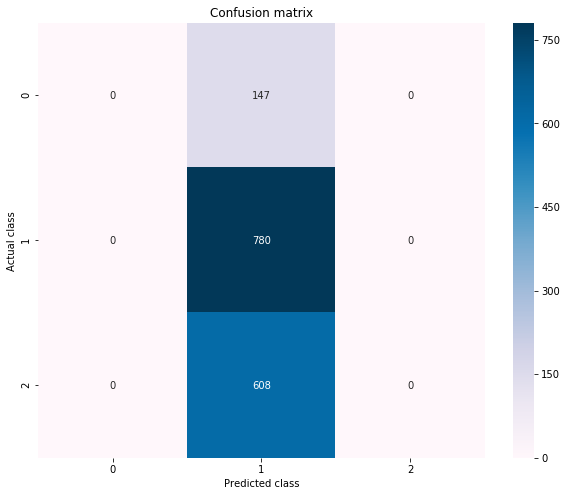

In [230]:
conf_matrix = confusion_matrix(y_actual, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='PuBu')
plt.title("Confusion matrix")
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

In [231]:
accuracy = accuracy_score(y_actual, y_pred)
print(accuracy)

0.50814332247557
